In [62]:
import pandas as pd
import numpy as np


In [63]:

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
dfcases = pd.read_csv(url,index_col=0,parse_dates=[0])

In [64]:
#dfcases = pd.read_csv('time_series_19-covid-Confirmed.csv')
dfcases = dfcases.drop(columns=['Lat','Long'])
dfcases.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Thailand,2,3,5,7,8,8,14,14,14,...,75,82,114,147,177,212,272,322,411,599.0
NaN,Japan,2,1,2,2,4,4,7,7,11,...,701,773,839,825,878,889,924,963,1007,1086.0
NaN,Singapore,0,1,3,3,4,5,7,7,10,...,200,212,226,243,266,313,345,385,432,455.0
NaN,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2.0
NaN,Malaysia,0,0,0,3,4,4,4,7,8,...,197,238,428,566,673,790,900,1030,1183,1306.0


In [65]:
#dfcases.set_index('Province/State','Country/Region').T

In [66]:
df = dfcases.groupby('Country/Region').sum()
#df = df.T
df = df.reset_index()
#df = df.drop([0, 1])
#df['index'] = df['index'].astype('datetime64')
#df = df.set_index('index')


df = df.rename(columns={'Country/Region': 'date'})

df = df.T
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.reset_index()
df = df.rename(columns={'index': 'dates'})
df['dates'] = df['dates'].astype('datetime64')
df = df.set_index('dates')
df = df.apply(pd.to_numeric) # convert all columns of DataFrame
df.head()


date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
dates,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,2,0,0


In [67]:
dfmax = pd.DataFrame(df.max(),columns=['max'] )
dfmax = dfmax.reset_index()
dfmax = dfmax.rename(columns={'date': 'country'})
#dfmax = dfmax.set_index('country')
dfmax.head()

,country,max
0,Afghanistan,40
1,Albania,89
2,Algeria,201
3,Andorra,113
4,Angola,2


In [68]:
dfmax = dfmax[dfmax['max'] > 600]
llist = dfmax['country'].values.tolist()
df = df[llist]
df.to_csv('df.csv')

In [69]:
# slice step to reverse values in index
#df[::-1]

In [70]:
dfgt = pd.DataFrame()
dflt = pd.DataFrame()
shift = {}

for country in llist:
    #print(country)
    dfgt[country] = df[country]>=100
    #print(pd.to_datetime('2020-01-22') - dfgt[country].idxmax())
    sh = pd.to_datetime('2020-01-22') - dfgt[country].idxmax()
    df[country] = df[country].shift(sh.days)


df['China'] = df['China'].shift(4)

In [71]:
#df = df.reset_index()

#pd.to_timedelta(df.index - pd.to_datetime('2020-01-22'))

df.index = pd.to_timedelta(df.index - pd.to_datetime('2020-01-22')).days
df

date,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Cruise Ship,Czechia,Denmark,...,Norway,Pakistan,Poland,Portugal,Spain,Sweden,Switzerland,Turkey,US,United Kingdom
dates,,,,,,,,,,,,,,,,,,,,,
0,107.0,104.0,109.0,151.0,108.0,155.0,NaN,135.0,141.0,264.0,...,108.0,136.0,103.0,112.0,120.0,101.0,114.0,192.0,118.0,116.0
1,128.0,131.0,169.0,151.0,117.0,201.0,NaN,135.0,189.0,444.0,...,147.0,236.0,119.0,169.0,165.0,161.0,214.0,359.0,149.0,164.0
2,128.0,182.0,200.0,162.0,193.0,238.0,NaN,175.0,253.0,617.0,...,176.0,299.0,177.0,245.0,222.0,203.0,268.0,670.0,217.0,207.0
3,200.0,246.0,239.0,200.0,198.0,238.0,NaN,175.0,298.0,804.0,...,205.0,454.0,238.0,331.0,259.0,248.0,337.0,1236.0,262.0,274.0
4,250.0,302.0,267.0,321.0,252.0,434.0,548.0,218.0,396.0,836.0,...,400.0,501.0,251.0,448.0,400.0,355.0,374.0,NaN,402.0,322.0
5,297.0,504.0,314.0,372.0,415.0,537.0,643.0,285.0,464.0,875.0,...,598.0,730.0,355.0,448.0,500.0,500.0,491.0,NaN,518.0,384.0
6,377.0,655.0,314.0,621.0,478.0,632.0,920.0,355.0,694.0,933.0,...,702.0,776.0,425.0,785.0,673.0,599.0,652.0,NaN,583.0,459.0
7,452.0,860.0,559.0,793.0,657.0,NaN,1406.0,454.0,833.0,1025.0,...,996.0,NaN,536.0,1020.0,1073.0,814.0,652.0,NaN,959.0,459.0
8,568.0,1018.0,689.0,1021.0,800.0,NaN,2075.0,542.0,995.0,1116.0,...,1090.0,NaN,634.0,1280.0,1695.0,961.0,1139.0,NaN,1281.0,802.0


In [72]:
dfmelt = df.reset_index()
dfmelt = dfmelt.melt(id_vars=['dates'])
dfmelt = dfmelt.rename(columns={'date': 'country'})
dfmelt = dfmelt.rename(columns={'value': 'cases'})
#dfmelt = dfmelt.drop(columns=['dates'])
dfmelt = dfmelt.set_index('dates')
dfmelt['country'] = dfmelt['country'].astype('category')
#dfmelt['cases'] = dfmelt['cases'].astype('int32') # fails due to nan
dfmelt.tail()

,country,cases
dates,,
56,United Kingdom,NaN
57,United Kingdom,NaN
58,United Kingdom,NaN
59,United Kingdom,NaN
60,United Kingdom,NaN


In [73]:
import plotly.express as px

In [75]:
fig = px.line(dfmelt, x=dfmelt.index, y="cases", color='country')#,log_y=True)
fig.show()
fig.write_html("infections_aligned.html")

In [76]:
figlog = px.line(dfmelt, x=dfmelt.index, y="cases", color='country',log_y=True)
figlog.show()
figlog.write_html("infections_logscal.html")

In [77]:
#scatlog = px.scatter(dfmelt, x=dfmelt.index, y="cases", color='country', trendline="lowess")
#scatlog.write_html("casesscatter.html")

In [78]:
dffull = dfcases#.set_index('Province/State','Country/Region')
dffull = dffull.head().T

dffull.columns = dffull.iloc[1]
dffull = dffull.drop(dffull.index[1])
dffull = dffull.reset_index()
dffull = dffull.rename(columns={'Country/Region': 'dates'})
#df = df.reset_index()
#df = df.rename(columns={'index': 'dates'})
#df['dates'] = df['dates'].astype('datetime64')
#df = df.set_index('dates')
dffull.tail()

1/22/20,index,2,2,0,0,0
56,3/18/20,212,889,313,1,790
57,3/19/20,272,924,345,1,900
58,3/20/20,322,963,385,1,1030
59,3/21/20,411,1007,432,1,1183
60,3/22/20,599,1086,455,2,1306


In [79]:
dffull.index

RangeIndex(start=0, stop=61, step=1)

In [80]:
%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [87]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

#def func(x, a, b):
#    return a * np.exp(b * x)

In [85]:
#plot = dfmelt.loc[dfmelt['country'] == 'Canada']
plot = dfmelt.loc[(dfmelt['country'] == 'Canada') & (dfmelt['cases'].isna() != True)]
plot#['cases'].isna()

,country,cases
dates,,
0,Canada,108.0
1,Canada,117.0
2,Canada,193.0
3,Canada,198.0
4,Canada,252.0
5,Canada,415.0
6,Canada,478.0
7,Canada,657.0
8,Canada,800.0


[ 188.47826593   -0.19480701 -108.0023751 ]


Text(0, 0.5, 'Number of Active Cases')

<Figure size 864x864 with 0 Axes>

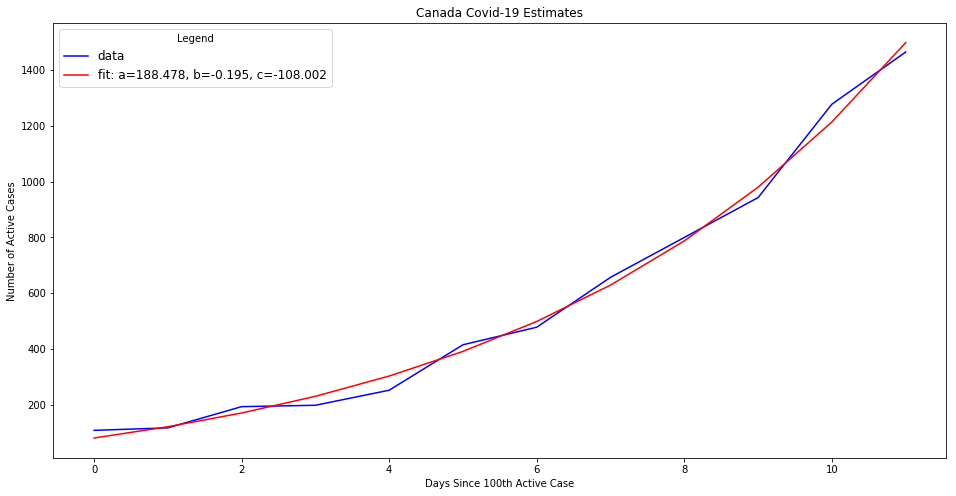

In [89]:
#px.scatter(dfmelt, x=dfmelt.index, y="cases", color='country', trendline="lowess")\
popt, pcov = curve_fit(func, plot.index, plot.cases)
print(popt)

## Must call fig size before we cann the distplot subplots.

plt.figure(figsize=(12, 12))

# Initialize figure and ax
fig, ax = plt.subplots(figsize=(16, 8))

# Set the scale of the x-and y-axes
#ax.set(yscale="log")



plt.plot(plot.index, plot.cases, 'b-', label='data')
plt.plot(plot.index, func(plot.index, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))\
         #label='fit: a=%5.3f, b=%5.3f' % tuple(popt))\

# Plot formatting
plt.legend(prop={'size': 12}, title = 'Legend')
plt.title('Canada Covid-19 Estimates')
plt.xlabel('Days Since 100th Active Case')
plt.ylabel('Number of Active Cases')
